In [1]:
%pylab --no-import-all
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Bernoulli

\begin{align}
P(\tt{x}=1) &= \phi \\
P(\tt{x}=0) &= 1 - \phi \\
P(\tt{x}=x) &= \phi^x(1-\phi)^x \\
\mathbb{E}_\tt{x}[\tt{x}] &= \phi \\
\tt{Var_x}(\tt{x}) &= \phi(1-\phi)
\end{align}

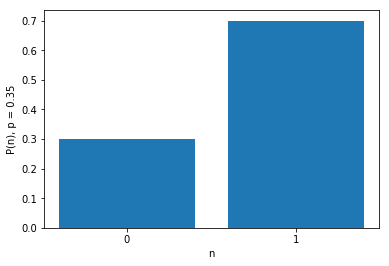

In [2]:
p = 1 - 0.65
bins = 2
y = [np.random.rand() for _ in xrange(20) ]
x_p = [0, 1]
y_0 = len([i for i in y if i < p])*1. / len(y)
y_1 = len([i for i in y if i >= p])*1. / len(y)
y_p = [y_0, y_1]
plt.bar(x_p, y_p)
plt.xticks(x_p)
plt.xlabel("n")
plt.ylabel("P(n), p = %.2f"%p)

## Gaussian

\begin{align}
\mathcal{N}(\tt{x}; \mu, \sigma^2) &= \sqrt{\frac{1}{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)
\end{align}

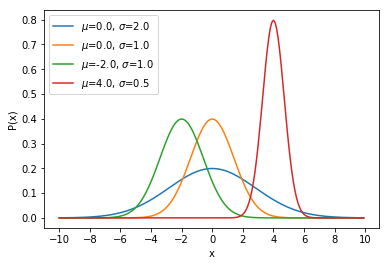

In [3]:
def normal(x, mu, sigma):
  return np.sqrt(1./(2*np.pi*sigma*sigma)*np.exp(-(x-mu)**2 / 2 / sigma/sigma))
  
  
mu = [0,0,-2,4]
sigma = [2,1,1,0.5]

x = np.arange(-10,10,0.1)
x_l = np.arange(-10,11,2)

for idx in xrange(len(mu)):
  y = map(lambda y: normal(y, mu[idx], sigma[idx]), x)
  plt.plot(x, y, label="$\mu$=%.1f, $\sigma$=%.1f"%(mu[idx], sigma[idx]))
  
plt.xticks(x_l)
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")


## Exponential and Laplace

\begin{align}
P_{exp}(\tt{x};\lambda) &= \lambda\mathbb{1}_{\tt{x} \ge 0}e^{-\lambda x} \\
P_{lap}(\tt{x}; \mu, \gamma) &= \frac{1}{\gamma}\exp\left(-\frac{|x-\mu|}{\gamma}\right)
\end{align}

where $\mathbb{1}_k \rightarrow$ Indicator function

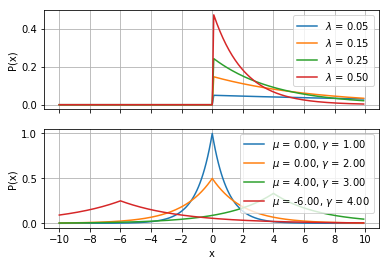

In [4]:
def exp(x, lamb):
  return lamb*(x >= 0) * np.exp(-lamb*x)
def lap(x, mu, gamma):
  return np.exp(-np.abs(x-mu)/gamma) / gamma

lamb = [0.05,.15,.25,.5]
fig, ax = plt.subplots(2, sharex=True)
for l in lamb:
  y = map(lambda y: exp(y, l), x)
  ax[0].plot(x, y, label="$\lambda$ = %.2f"%l)
ax[0].set_xticks(x_l)
ax[0].legend()
# ax[0].set_xlabel("x")
ax[0].set_ylabel("P(x)")
ax[0].grid()

mu = [0, 0, 4, -6]
gamma = [1,2,3,4]
for idx in xrange(len(mu)):
  y = map(lambda y: lap(y, mu[idx], gamma[idx]), x)
  ax[1].plot(x, y, label="$\mu$ = %.2f, $\gamma$ = %.2f"%(mu[idx], gamma[idx]))
ax[1].set_xticks(x_l)
ax[1].legend()
ax[1].set_xlabel("x")
ax[1].set_ylabel("P(x)")
ax[1].grid()

## Sigmoid

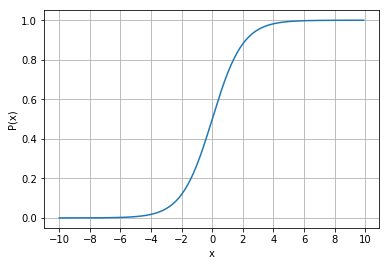

In [5]:
def sigmoid(x):
  return 1./(1+np.exp(-x))

y = map(sigmoid, x)

plt.plot(x, y)
plt.xticks(x_l)
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid()

## Softplus and Softmax

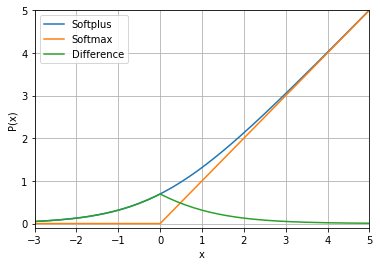

In [6]:
def softplus(x):
  return np.log(1 + np.exp(x))
def softmax(x):
  return 0 if x < 0 else x

y_plus = map(softplus, x)
y_max = map(softmax, x)

plt.plot(x, y_plus, label="Softplus")
plt.plot(x, y_max, label="Softmax")
plt.plot(x, np.subtract(y_plus, y_max), label="Difference")
plt.axis([-3,5, -.1, 5])
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid()

## Saddle (just for fun)

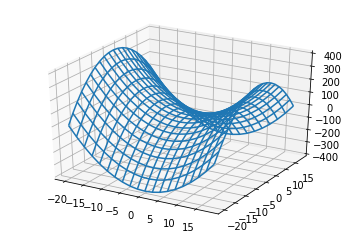

In [7]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.arange(-20,20,2.)
x2 = np.arange(-20,20,2.)
X1, X2 = np.meshgrid(x1, x2)
Y = X1**2 - X2**2
ax.plot_wireframe(X1,X2,Y)
# ax.scatter([0],[0],[0], c='r', s=100)

## Gradient-Based LInear Least Squares

Easy solution:
[[ -8.02309608e-18]
 [  1.00000000e+00]]
Cost: 414 steps, Error: 0.000015%
GD solution:
[[ 2.99999995]
 [ 8.99998521]]


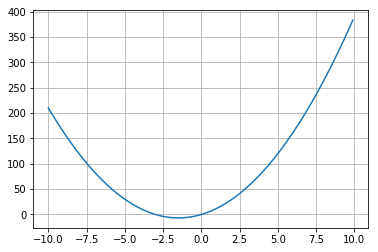

In [65]:
features = 2
A_1 = np.arange(-10,10,0.1)
A = np.array([A_1**2, A_1]).T
x_seed = np.random.randint(-10, 10, features)[np.newaxis].T
b = np.dot(A,x_seed)

plt.plot(A_1, b)
plt.grid()

# Solution:
# x = (A^T * A)^-1 * A^T *y
print "Easy solution:\n", x_sol1

x = np.random.randint(-10, 10, features)[np.newaxis].T
idx = 0
X = []
Y = []

step = 0.00000488
delta = 0.1
x_sol1 = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
cost = lambda x: np.linalg.norm(np.dot(np.dot(A.T,A),x) - np.dot(A.T, b),2)
while cost(x) > delta and idx < 10000:
  x = x - step*(np.dot(np.dot(A.T, A),x) - np.dot(A.T, b))
  idx += 1
  # X.append(x)
# print "Gradient solution:\n", x
print "Cost: %d steps, Error: %f%%"%(idx, np.sqrt((x_seed[0] - x[0])**2 + (x_seed[1] - x[1])**2))
print "GD solution:\n", x

  
